# Introduction

In this section we will set the paths and load the data. We will then explain the data structure and do a few sanity checks.

Import the required modules:

In [1]:
import os
import numpy as np
import mne

# Loading the data

Loading the data. The MEGIN data are stored in the FIF format which is a binary format with embedded labels.

As a first step, we set the path to the data. Note that this will dependent on where you have stored the dataset. Afterwards, we set the file names.

In [2]:
# data_path = r'C:\Users\JensenO\Dropbox\FLUX\Development\FLUX\data'
data_path = r'C:\Users\Ole\Dropbox\FLUX\Development\FLUX\data'
file_name = ['training_raw-1.fif','training_raw-2.fif']

There is a limit to the file size of the FIF files. If the MEG recording exceed this limit, the MEGIN acquisition system automatically split the data in two or more FIF files. In those cases, by reading the first FIF file MNE-Python you will automatically read all the linked split files. In our case, the sample dataset was broken into 2 sub-files by the operator and we need to read them one by one. 

Let's start by reading the first file:

In [3]:
path_data = os.path.join(data_path,file_name[0]) 

In [4]:

data1 = mne.io.read_raw_fif(path_data)

Opening raw data file C:\Users\ferranto\Downloads\flux_sample\training_raw-1.fif...


<ipython-input-4-68b653abda30>:1: RuntimeWarning: This filename (C:\Users\ferranto\Downloads\flux_sample\training_raw-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data1 = mne.io.read_raw_fif(path_data)


    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 208000 ... 1664999 =    208.000 ...  1664.999 secs
Ready.


To get some basic information from the FIF file write:

In [5]:
print(data1)

<Raw | training_raw-1.fif, 343 x 1457000 (1457.0 s), ~5.4 MB, data not loaded>


The 5.4 MB refer to the size of the data set. The 1457.0 s is the recording time. As the sampling rate was 1000 Hz, this results in 1457000 samples recorded in 343 channels. These channels include the MEG, EOG, triggers channels etc.

To get some additional information:

In [6]:
print(data1.info)

<Info | 23 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 3 BIO, 11 IAS, 102 MAG, 204 GRAD, 3 MISC, 18 STIM, 2 SYST
 custom_ref_applied: False
 description: TRIUX system at XXX
 dev_head_t: MEG device -> head transform
 dig: 403 items (3 Cardinal, 4 HPI, 396 Extra)
 events: 1 item (list)
 experimenter: XXX
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 343
 proj_name: XXX
 projs: generated with autossp-1.2.0: off, generated with autossp-1.2.0: ...
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>


This set of information show some important parameters of the dataset. For instance, we can see that the gantry was positioned at 68 degress (*gantry_angle*) and that the sampling frequency was 1000 Hz (*sfreq*). The data were lowpass filtered at 330.0 Hz (*lowpass*) and highpass filtered at 0.1 Hz (*highpass*) prior to the digital sampling.

**Question 1:** What is the purpose of the 330 Hz lowpas-filter (hint: see Analog Filters for Data Conversion, Chapter 3; Smith et al., 1999)

**Question 2:** What is the purpose of 0.1 Hz highpass-filter?


The data object (*data1*) allows for a simple inspection of the data by plotting the spectra:

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


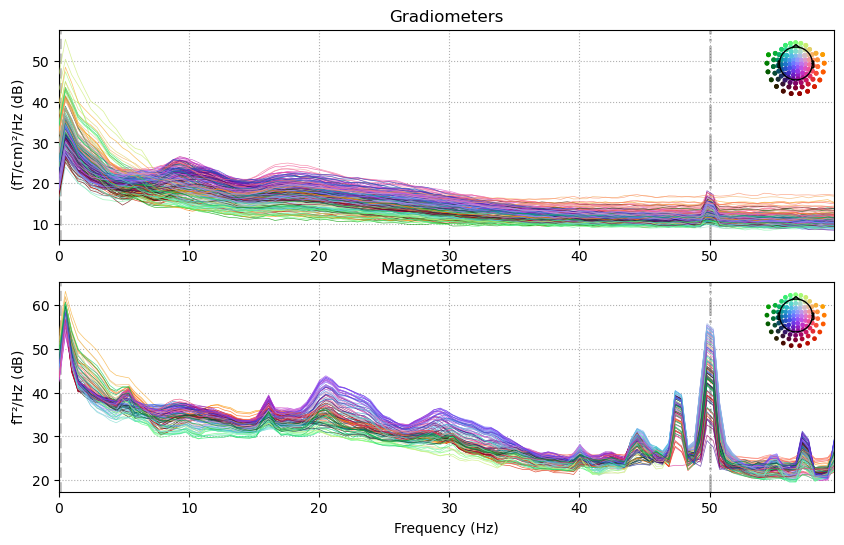

In [7]:
%matplotlib inline
data1.plot_psd(fmax=60);

Note the 10 Hz alpha activity on the gradiometers as well as the 50 Hz line noise. The frequency of the line noise is 50 Hz in European countries including Russia whereas it is 60 in South Korea as well as South and North America. In Japan it can be either 50 or 60 Hz depending on the region.

**Question 3:** Why is the line-noise 50 Hz larger for the magnetometers than the gradiometers?


To show the raw data use:

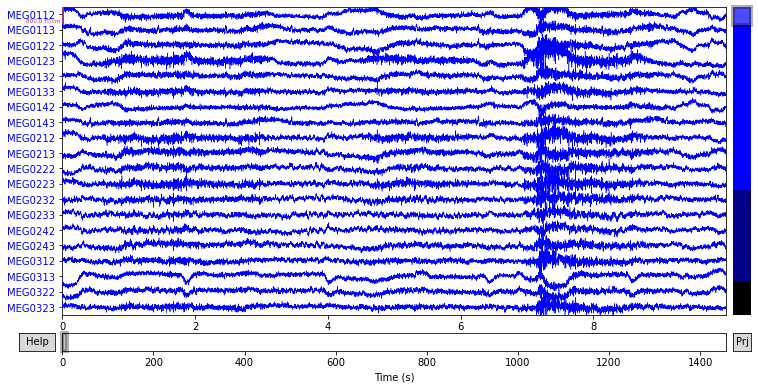

In [11]:
%matplotlib inline
data1.plot(duration=10,title='Raw');

To enable the interactive functions of the plotting tool run: 

In [12]:
%matplotlib qt
data1.plot(duration=10,title='Raw');

Channels marked as bad: none


This will open the plot in a new window. Use the arrow keys to move over channels and time. Click on the help button for more information.


**Question 3:** Scroll through the MEG data and identify the following artifacts (include figures in the response):

- Eye-blink
- A muscle contraction (characterized by high-frequency activity
- The cardiac artifact





## Preregistration and publication

Preregistration: report the sampling frequency and the properties of the anti-aliasing lowpass filter. Also report the peripheral data to be recorded (e.g. the EOG and ECG)

Publication, example:

"The ongoing MEG data were recored using the TRIUX$^{TM}$ system from MEGIN. This system has 102 magnetometers and 204 planer gradiometers. These are placed at 102 locations each having one magnetometers and a set of two orthogonal gradiometers. The horizontal and vertical EOG data were acquired together with the MEG data. The data were sampled at 1000 Hz and stored for offline analysis. Prior to sampling, a lowpass filter at ~330 Hz was applied."

## References
Smith, W.S. (1997) The Scientist and Engineer's Guide to Digital Signal Processing. California Technical Publishing. ISBN 0-9660176-3-3 [Online version](http://www.dspguide.com/)